In [36]:
import tensorflow as tf
import numpy as np

In [2]:
(x_train_all, y_train_all),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
class_names = ['티셔츠/윗도리','바지','스웨터','드레스','코트','샌들','셔츠','스니커즈','가방','앵글부츠']

4423680/4422102 [==============================] - 1s 0us/step


In [4]:
print(x_train_all.shape, y_train_all.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)


In [21]:
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(48000, 28, 28) (12000, 28, 28) (48000,) (12000,)


In [22]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [23]:
x_train = x_train /255
x_val = x_val / 255
x_train = x_train.reshape(-1,784)
x_val = x_val.reshape(-1,784)

In [24]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:
x_train.shape

(48000, 784)

In [27]:
# y 전처리
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [29]:
y_train_encoded.shape

(48000, 10)

In [40]:
class MultiClassNetwork : 
    def __init__(self,l1=0, l2=0, learning_rate=0.1, batch_size=32, units=10) :
        self.w1 = None
        self.b1 = None
        self.w2 = None
        self.b2 = None
        self.a1 = None
        self.l1 = l1
        self.l2 = l2
        self.lr = learning_rate
        self.batch_size = batch_size
        self.losses = []
        self.val_losses = []
        self.units = units

    def forpass(self, x) : 
        z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.sigmoid(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        return z2
    
    def sigmoid(self, z) :
        a = 1 / (1+np.exp(-z))
        return a

    def softmax(self, z) :
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1).reshape(-1,1)

    def backprop(self,x,err) :
        m = len(x)
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m

        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1-self.a1)

        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad

    def fit(self,x, y, epochs, x_val=None, y_val=None) :
        np.random.seed(42)
        self.init_weights(x.shape[1], y.shape[1])

        for i in range(epochs) :
            loss = 0
            print('.', end='')
            for x_batch, y_batch in self.gen_batch(x,y) :
                a = self.training(x_batch, y_batch)
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += np.sum(-y_batch*np.log(a))
                self.losses.append((loss + self.reg_loss()) / len(x))
                self.update_val_loss(x_val, y_val)
    
    def init_weights(self, n_features, n_classes) :
        self.w1 = np.random.normal(0,1, (n_features, self.units))
        self.b1 = np.zeros(self.units)
        self.w2 = np.random.normal(0,1, (self.units, n_classes))
        self.b2 = np.zeros(n_classes)

    def update_val_loss(self, x_val, y_val) :
        z = self.forpass(x_val)
        a = self.softmax(z)
        a = np.clip(a, 1e-10, 1-1e-10)
        val_loss = np.sum(-y_val*np.log(a))
        self.val_losses.append((val_loss + self.reg_loss()) /  len(y_val))

    def reg_loss(self) :
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + self.l2/2 * (np.sum(self.w1**2) + np.sum(self.w2**2))
    
    def gen_batch(self, x, y) :
        length = len(x)
        bins = length // self.batch_size
        if length % self.batch_size :
            bins += 1
            indexes = np.random.permutation(np.arange(len(x)))
            x = x[indexes]
            y = y[indexes]
            for i in range(bins) :
                start = self.batch_size * i
                end = self.batch_size * (i+1)
                yield x[start:end], y[start:end]
    
    def training(self, x, y) :
        m = len(x)
        z = self.forpass(x)
        a = self.softmax(z)
        err = -(y-a)
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x,err)
        w1_grad += (self.l1*np.sign(self.w1) + self.l2*self.w1) / m
        w2_grad += (self.l1*np.sign(self.w2) + self.l2*self.w2) /m
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a

    def predict(self, x) :
        z = self.forpass(x)
        return np.argmax(z, axis=1)
      
    def score(self, x, y) :
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

In [41]:
fc = MultiClassNetwork(batch_size = 256, units = 100)
fc.fit(x_train, y_train_encoded, x_val = x_val, y_val = y_val_encoded, epochs = 40)

........................................

In [43]:
import matplotlib.pyplot as plt

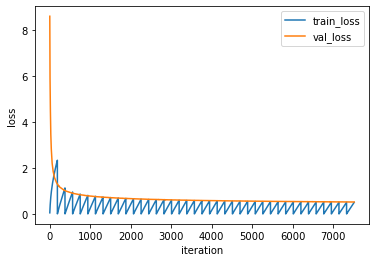

In [44]:
plt.plot(fc.losses)
plt.plot(fc.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()